In [119]:
import pandas as pd
import re
from wordcloud import WordCloud 
from collections import defaultdict 
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes',unicode_minus = False)
import konlpy

In [184]:
def kor(s):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', s) 
    return result

In [1]:
def adj(a):
    b=okt.pos(a, stem=True)
    clean = []
    for word in b:
        if word[1] in ['Adjective', 'NOUN', 'Verb']: 
            clean.append(word[0])
    wordlist = " ".join( clean )
    return wordlist

In [2]:
def word_cloud(wordlist):
    b = defaultdict(int)
    for i, j in wordlist:
        b[i] = j
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/NanumGothic.ttf', background_color='white',colormap = "Accent_r",
                          width=1500, height=1000).generate_from_frequencies(b)

    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [227]:
path=[['link', '중성화수술'], ['teeth', '치과치료'], ['leg', '다리수술'], ['eye', '안과치료'],
      ['cancer', '종양수술'], ['rock', '결석제거 수술'], ['intestine', '탈장수술'], 
      ['baby', '자국축농증수술'], ['korean', '한방치료']]

In [299]:
table_open =open('SentiWord_Dict.txt', encoding = 'utf-8')
link1=[]
lines = table_open.readlines()
for line in lines:    
    line_list = line.replace('\n','').split('\t')
    link1.append(line_list)
table_open.close()
s_dict=[]
for j in link1:
    c=[j[0], int(j[1])]
    s_dict.append(c)

In [300]:
a=''
for j in path:
    name = j[0]
    df1 = pd.read_csv(name+"_purecomment.csv")
    for j in df1.pcomment:
        a=a+' '+j
okt = konlpy.tag.Okt()
b=okt.pos(a, stem=True)
clean = []
for word in b:
    if word[1] in ['Adjective']: 
        clean.append(word[0])
wordlist = " ".join( clean )

In [301]:
wordcount = []
for j in s_dict:
    c = wordlist.count(j[0])
    wordcount.append([j[0], c])
wordcount.sort(key=lambda x: x[1], reverse=True)
wordcount_sort = wordcount[:2]

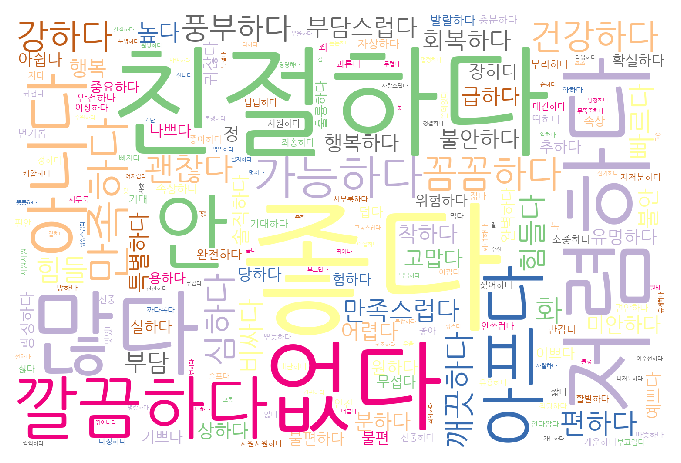

In [308]:
word_cloud(wordcount)

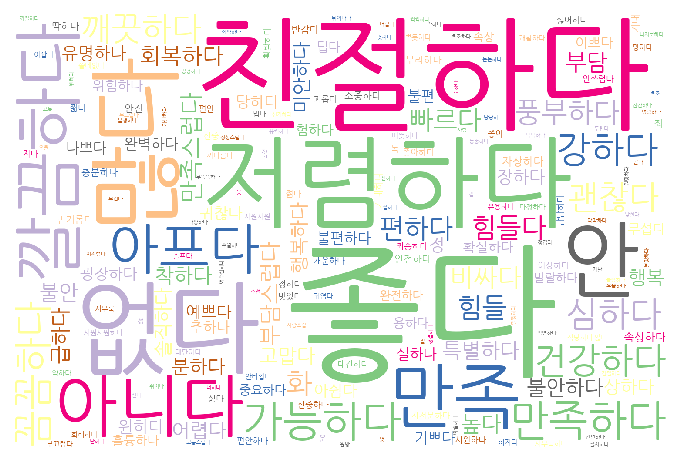

In [118]:
word_cloud(wordcount)

In [144]:
okt = konlpy.tag.Okt()
for i in path:
    featurelist = []
    name = i[0]
    df1 = pd.read_csv(name+".csv")
    for j in df1.comment:
        b=okt.pos(j, stem=True)
        clean = []
        for word in b:
            if word[1] in ['Adjective']: 
                clean.append(word[0])
        wordlist = " ".join( clean )
        wordcount = []
        for k in s_dict:
            c = wordlist.count(k[0])
            wordcount.append([k[0], c])
        wordcount.sort(key=lambda x: x[1], reverse=True)
        feature = [wordcount[0][0], wordcount[1][0]]
        if wordcount[1][1] == 0:
            feature = ['none'] 
        featurelist.append(feature)
    df1['feature'] = featurelist 
    df1.to_csv(name+"feature.csv", mode='w')

In [243]:
df=pd.read_csv('intestinefeature.csv')
df

,Unnamed: 0,Unnamed: 0.1,hname,rname,area,comment,rating,commentcounts,feature
0,0,0,심바동물병원,탈장수술,intestine,[],none,0,['none']
1,1,1,잠실준25시동물병원,탈장수술,intestine,[],none,0,['none']
2,2,2,사랑동물병원,탈장수술,intestine,[],none,0,['none']
3,3,3,아이비동물병원,탈장수술,intestine,[' 2019-05-23\n아이비동물병원 이용후기\n탈장수술 건으로 아이비동물병원 ...,5.0,1,"['가능하다', '많다']"
4,4,4,둘리동물병원,탈장수술,intestine,[' 2019-10-01\n이제 안 아파하니 좋아요\n강아지 배쪽에 뭐가 불룩하게 ...,none,1,"['무섭다', '부담']"
5,5,5,닥터펫동물의료센터,탈장수술,intestine,"[' 2019-01-18\n수술 잘 받았습니다\n병원도 좋고, 원장님 간호사 선생님...",none,3,"['많다', '친절하다']"
6,6,6,우리들동물종합병원,탈장수술,intestine,[' 2019-01-15\n감사합니다!\n서혜부 탈장기가 있었는데 일상 생활에 큰 ...,none,2,"['없다', '저렴하다']"
7,7,7,사랑의동물병원,반려견 탈장수술,intestine,[' 2019-01-16\n수술 잘 됐어요\n선생님도 넘 친절하시고 설명도 너무 잘...,none,1,"['친절하다', '저렴하다']"
8,8,8,행복한동물병원,탈장수술,intestine,"["" 2019-07-23\n탈장수술!\n수술 무사히 잘 끝나고 집으로 복귀했네요 ㅎ...",none,4,"['아프다', '저렴하다']"
9,9,9,하니동물병원,탈장수술,intestine,[' 2018-09-14\n감사요\n집에 처음 데려왔을때 부터 배에 뽈록한게 있었는...,none,1,['none']


In [309]:
## 전체분석
def emo_score(t):
    j1=0
    j2=0
    score=0
    for j in s_dict:
        a=t.count(j[0])
        score=score+j[1]*a
        if j[1]>0:
            j1=j1+a
        else:
            j2=j2+a
    if j1>j2 and score<0:
        score=0
    return score

In [288]:
## 사용자별 분석
def emo_score(t):
    j1=0
    j2=0
    score=0
    c=0
    b=t.split("',")
    for k in b:
        for j in s_dict:
            a=k.count(j[0])
            score=score+j[1]*a
            
        if score > 0:
            c=c+1
        elif score < 0:
            c=c-1
        else:
            c=c
        score=0
    return c

In [91]:
## 문장별 분석
def emo_score1(t):
    j1=0
    j2=0
    score=0
    c=0
    t = t.replace('?', '.')
    t = t.replace('!', '.')
    b = t.split('.')
    for k in b:
        k = adj(k)
        for j in s_dict:
            a=k.count(j[0])
            score=score+j[1]*a 
        if score > 0:
            c=c+1
        elif score < 0:
            c=c-1
        else:
            c=c
        score=0
    return c

In [92]:
##for 문장별 분석
def com_sort1(name):
    df=pd.read_csv(name+".csv")
    a=[]
    for i in df.comment:
        a.append(emo_score1(i))
    df['co_score']=a
    if len(df)>=10:
        b=df.sort_values('co_score', ascending=False)
    else:
        b=df.sort_values('co_score', ascending=False)
        b=b[b['co_score']>=0]
    b1=b.drop_duplicates(['hname'], keep='first').head(10)
    return b1

In [218]:
def com_sort(name):
    df1=pd.read_csv(name+"_purecomment.csv")
    df2=pd.read_csv(name+"feature.csv")
    a=[]
    for i in df1.pcomment:
        a.append(emo_score(i))
    df2['co_score']=a
    b=df2.sort_values('co_score', ascending=False)
    b=b[b['co_score']>0]
    b1=b.drop_duplicates(['hname'], keep='first')
    if len(b1)>10:
        b1=b1.head(10)
    return b1

In [312]:
def comprint(b):
    print("댓글 감정 분석을 통해 정렬한 결과입니다.")
    i=1
    for j in b.index:
        a=kor(b['feature'][j]).split(' ')
        try:
            print("%2d. %s,\t특징: %s, %s" %(i, b['hname'][j], a[0], a[1]))
        except IndexError:
            print("%2d. %s,\t특징: 특징을 알기에는 댓글이 너무 적어요" %(i, b['hname'][j]))
        i=i+1

In [289]:
def comprint1(b):
    print("댓글 감정 분석을 통해 정렬한 결과입니다.")
    i=1
    for j in b.index:
        print("%2d. %s" %(i, b['hname'][j]))
        i=i+1

In [313]:
def comrank(name):
    print("%s에는 여기가 좋아요" %name[1])
    comprint(com_sort(name[0]))

In [314]:
print('어떤 치료가 필요한가요?')
for i in range(len(path)):
    if i<8:
        print ('%s : %d, ' %(path[i][1], i+1), end = ' ')
    else:
        print ('%s : %d, ' %(path[i][1], i+1))    
x =  int(input(' : '))-1
comrank(path[x])
print('\n')
raterank(path[x])

어떤 치료가 필요한가요?
중성화수술 : 1,  치과치료 : 2,  다리수술 : 3,  안과치료 : 4,  종양수술 : 5,  결석제거 수술 : 6,  탈장수술 : 7,  자국축농증수술 : 8,  한방치료 : 9, 
 : 1
중성화수술에는 여기가 좋아요
댓글 감정 분석을 통해 정렬한 결과입니다.
 1. 참사랑동물병원,	특징: 좋다, 친절하다
 2. 하니동물병원,	특징: 친절하다, 좋다
 3. 고덕24시동물병원,	특징: 좋다, 친절하다
 4. 심바동물병원,	특징: 많다, 친절하다
 5. 아이비동물병원,	특징: 좋다, 꼼꼼하다
 6. 카카오N동물병원,	특징: 좋다, 친절하다
 7. 교대동물병원,	특징: 좋다, 만족
 8. 리오동물병원,	특징: 많다, 좋다
 9. 모범동물병원,	특징: 좋다, 깔끔하다
10. 행복한동물병원,	특징: 행복, 행복하다


평점순으로 정렬한 결과입니다.
 1. 심바동물병원, 평점 : 5.0
 2. 좋은동물병원, 평점 : 5.0
 3. 고덕24시동물병원, 평점 : 5.0
 4. 리오동물병원, 평점 : 5.0
 5. 교대동물병원, 평점 : 5.0
 6. 카카오N동물병원, 평점 : 5.0
 7. 나루동물병원, 평점 : 5.0
 8. 사랑의동물병원, 평점 : 5.0
 9. 모범동물병원, 평점 : 5.0
10. 우리들동물종합병원, 평점 : 5.0
11. 아이비동물병원, 평점 : 5.0
12. 사랑동물병원, 평점 : 5.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [291]:
##사용자별 분석
for i in range(len(path)):
    comrank(path[i])
    print('\n')

중성화수술에는 여기가 좋아요
댓글 감정 분석을 통해 정렬한 결과입니다.
 1. 참사랑동물병원
 2. 하니동물병원
 3. 고덕24시동물병원
 4. 카카오N동물병원
 5. 심바동물병원
 6. 교대동물병원
 7. 나루동물병원
 8. 모범동물병원
 9. 아이비동물병원
10. 리오동물병원


치과치료에는 여기가 좋아요
댓글 감정 분석을 통해 정렬한 결과입니다.
 1. 나루동물병원
 2. 노아동물병원
 3. 사랑의동물병원
 4. 도그플러스 강서점
 5. 하니동물병원
 6. 보람동물병원
 7. 잠실준25시동물병원
 8. 아이엠동물병원
 9. 아이비동물병원
10. 우리들동물종합병원


다리수술에는 여기가 좋아요
댓글 감정 분석을 통해 정렬한 결과입니다.
 1. 노아동물병원
 2. 아이비동물병원
 3. 아이엠동물병원
 4. 우리들동물종합병원
 5. 사랑의동물병원
 6. 잠실준25시동물병원
 7. 닥터펫동물의료센터
 8. 마루동물병원
 9. 도그플러스 강서점


안과치료에는 여기가 좋아요
댓글 감정 분석을 통해 정렬한 결과입니다.
 1. 서교동물병원
 2. 아이비동물병원


종양수술에는 여기가 좋아요
댓글 감정 분석을 통해 정렬한 결과입니다.
 1. 둘리동물병원
 2. 아이비동물병원
 3. 우리들동물종합병원


결석제거 수술에는 여기가 좋아요
댓글 감정 분석을 통해 정렬한 결과입니다.
 1. 잠실준25시동물병원
 2. 둘리동물병원
 3. 사랑의동물병원


탈장수술에는 여기가 좋아요
댓글 감정 분석을 통해 정렬한 결과입니다.
 1. 닥터펫동물의료센터
 2. 사랑의동물병원
 3. 하니동물병원


자국축농증수술에는 여기가 좋아요
댓글 감정 분석을 통해 정렬한 결과입니다.
 1. 아이엠동물병원
 2. 고덕24시동물병원
 3. 도그플러스 강서점
 4. 심바동물병원
 5. 잠실준25시동물병원
 6. 우리들동물종합병원


한방치료에는 여기가 좋아요
댓글 감정 분석을 통해 정렬한 결과입니다.




In [48]:
for i in range(len(path)):
    comrank(path[i])
    print('\n')

중성화수술에는 여기가 좋아요
댓글 감정 분석을 통해 정렬한 결과입니다.
 1. 참사랑동물병원
 2. 하니동물병원
 3. 고덕24시동물병원
 4. 심바동물병원
 5. 아이비동물병원
 6. 카카오N동물병원
 7. 교대동물병원
 8. 리오동물병원
 9. 모범동물병원
10. 좋은동물병원


치과치료에는 여기가 좋아요
댓글 감정 분석을 통해 정렬한 결과입니다.
 1. 하니동물병원
 2. 아이비동물병원
 3. 보람동물병원
 4. 도그플러스 강서점
 5. 사랑의동물병원
 6. 나루동물병원
 7. 우리들동물종합병원
 8. 사랑동물병원
 9. 서교동물병원
10. 카카오N동물병원


다리수술에는 여기가 좋아요
댓글 감정 분석을 통해 정렬한 결과입니다.
 1. 아이비동물병원
 2. 노아동물병원
 3. 우리들동물종합병원
 4. 잠실준25시동물병원
 5. 사랑의동물병원
 6. 아이엠동물병원
 7. 닥터펫동물의료센터
 8. 마루동물병원
 9. 도그플러스 강서점
10. 해맑은동물병원


안과에는 여기가 좋아요
댓글 감정 분석을 통해 정렬한 결과입니다.
 1. 서교동물병원
 2. 아이비동물병원
 3. 사랑의동물병원
 4. 사랑동물병원
 5. 노아동물병원


종양수술에는 여기가 좋아요
댓글 감정 분석을 통해 정렬한 결과입니다.
 1. 사랑의동물병원
 2. 아이비동물병원
 3. 둘리동물병원
 4. 우리들동물종합병원
 5. 아이엠동물병원
 6. 심바동물병원
 7. 우리동물병원
 8. 하니동물병원
 9. 카카오N동물병원
10. 형제종합동물병원


결석제거 수술에는 여기가 좋아요
댓글 감정 분석을 통해 정렬한 결과입니다.
 1. 둘리동물병원
 2. 잠실준25시동물병원
 3. 사랑의동물병원
 4. 심바동물병원
 5. 보람동물병원
 6. 사랑동물병원
 7. 노아동물병원
 8. 우리동물병원
 9. 하니동물병원
10. 나루동물병원


탈장수술에는 여기가 좋아요
댓글 감정 분석을 통해 정렬한 결과입니다.
 1. 닥터펫동물의료센터
 2. 사랑의동물병원
 3. 우리들동물종합병원
 4. 노아동물병원
 5. 하니

In [261]:
def rate_sort(name):
    n=0
    df1=pd.read_csv(name+"real.csv")
    for i in range(len(df1)):
        try:
            df1['rating'][i]=float(df1['rating'][i])
        except ValueError: 
            df1['rating'][i]=0
    
    if len(df1)>=10:
        b=df1.sort_values('rating', ascending=False)
        b=b.drop_duplicates(['hname'], keep='first')
        for i in b.index:    
            if b['rating'][i]==5.0:
                n=n+1
        n1=max(n,10)
        b1=b.head(n1)
    else:
        b=df1.sort_values('rating', ascending=False)
        b1=b.drop_duplicates(['hname'], keep='first')
    b2=b1[b1['rating']>0]
    return b2

In [234]:
def rateprint(b):
    print("평점순으로 정렬한 결과입니다.")
    i=1
    for j in b.index:
        print("%2d. %s, 평점 : %s" %(i,b['hname'][j],b['rating'][j])) 
        i=i+1

In [241]:
def raterank(b):
#    print("%s에는 여기가 좋아요" %b[1])
    a=rate_sort(b[0])
    rateprint(a)


In [2]:
df1=pd.read_csv('koreanreal.csv')

In [199]:
    name='link'
    df=pd.read_csv(name+".csv")
    df1=pd.read_csv(name+"_purecomment.csv")
    a=[]
    for i in df1.pcomment:
        a.append(emo_score(i))
    df['co_score']=a
    b=df.sort_values('co_score', ascending=False)

In [288]:
    for j in a.index:
        print("%2d. %s1, %s2" %(i,a['hname'][j],a['rating'][j])) 
        i=i+1

29. 우리들동물종합병원1, 5.02
30. 좋은동물병원1, 5.02
31. 사랑의동물병원1, 5.02
32. 고덕24시동물병원1, 5.02
33. 리오동물병원1, 5.02
34. 노아동물병원1, 4.92
35. 참사랑동물병원1, 4.92
36. 아이엠동물병원1, 4.92
37. 하니동물병원1, 4.92
38. 행복한동물병원1, 4.82


잠실준25시동물병원


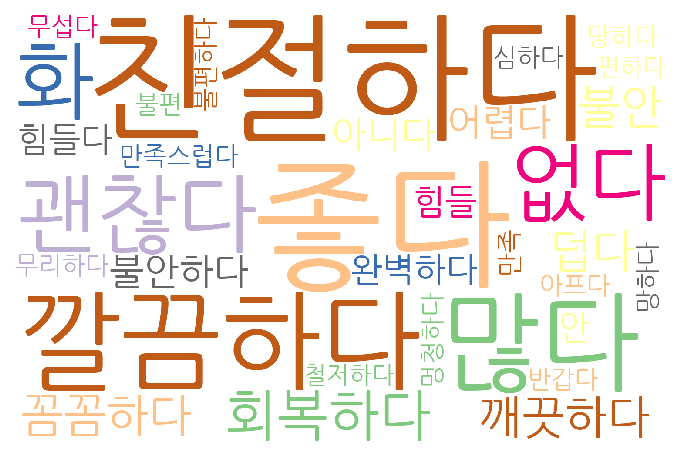

In [279]:
name = '잠실준25시동물병원'
okt = konlpy.tag.Okt()
a=''
for k in path:
    df1 = pd.read_csv(k[0]+".csv")
    for i in df1.index:
        if df1.hname[i]== name:
            a=a+df1.comment[i]
b=okt.pos(a, stem=True)
clean = []
for word in b:
    if word[1] in ['Adjective']: 
        clean.append(word[0])
wordlist = " ".join( clean )
wordcount = []
for j in s_dict:
    c = wordlist.count(j[0])
    wordcount.append([j[0], c])
print(name)
word_cloud(wordcount)

In [281]:
def hospital_cloud(name):
    okt = konlpy.tag.Okt()
    a=''
    for k in path:
        df1 = pd.read_csv(k[0]+".csv")
        for i in df1.index:
            if df1.hname[i]== name:
                a=a+df1.comment[i]
    b=okt.pos(a, stem=True)
    clean = []
    for word in b:
        if word[1] in ['Adjective']: 
            clean.append(word[0])
    wordlist = " ".join( clean )
    wordcount = []
    for j in s_dict:
        c = wordlist.count(j[0])
        wordcount.append([j[0], c])
    print(name)
    word_cloud(wordcount)

도그플러스 강서점


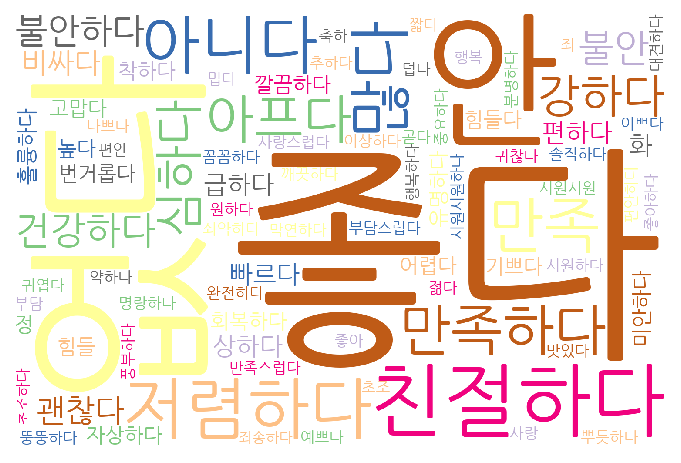

In [294]:
hospital_cloud('도그플러스 강서점')

In [ ]:
#잠실준25시동물병원
name = 'link'
i=1

df1 = pd.read_csv(name+".csv")
okt = konlpy.tag.Okt()

b=okt.pos(df1.comment[i], stem=True)
clean = []
for word in b:
    if word[1] in ['Adjective']: 
        clean.append(word[0])
wordlist = " ".join( clean )
wordcount = []
for j in s_dict:
    c = wordlist.count(j[0])
    wordcount.append([j[0], c])
print(df1.hname[i])
word_cloud(wordcount)

In [263]:
def pet_hospital():
    print('어떤 치료가 필요한가요?')
    for i in range(len(path)):
        if i<8:
            print ('%s : %d, ' %(path[i][1], i+1), end = ' ')
        else:
            print ('%s : %d, ' %(path[i][1], i+1))    
    x =  int(input(' : '))-1
    comrank(path[x])
    print('\n')
    raterank(path[x])

In [ ]:
pet_hospital()

어떤 치료가 필요한가요?
중성화수술 : 1,  치과치료 : 2,  다리수술 : 3,  안과치료 : 4,  종양수술 : 5,  결석제거 수술 : 6,  탈장수술 : 7,  자국축농증수술 : 8,  한방치료 : 9, 
